This Multi Layer Perceptron (MLP) consists of an input layer, a hidden layer and an output layer. The aim of this exercise is to show how the Error Back Propagation (EBP) algorithm can be implemented in an ANN. And compare two methods of batch learning and pattern by pattern learning with each other in terms of convergence rate.

In [ ]:
__Author__ = "Kiavash Yazdankish"

import numpy as np
import matplotlib.pyplot as plt
import time

# Desired and input values
s vectors are input values and d vectors are the desired ones.
The architecture of the ANN is as follows:
input layer: 9 neurons
hidden layer: 6 neurons
output layer: 2 neurons.

In [ ]:
input_count = 9
P = 8
output_count = 2
s = np.zeros([P, input_count])
d = np.zeros([P, output_count])
Emax = 0.1
hidden_layers = 6

s[0, :] = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])
s[1, :] = np.array([9, 8, 7, 6, 5, 4, 3, 2, 1])
s[2, :] = np.array([0, 9, 1, 8, 2, 7, 3, 6, 4])
s[3, :] = np.array([4, 5, 6, 3, 2, 7, 1, 8, 0])
s[4, :] = np.array([3, 8, 2, 7, 1, 6, 0, 5, 9])
s[5, :] = np.array([1, 6, 0, 7, 4, 8, 3, 9, 2])
s[6, :] = np.array([2, 1, 3, 0, 4, 9, 5, 8, 6])
s[7, :] = np.array([9, 4, 0, 5, 1, 6, 2, 7, 3])

d[0, :] = np.array([1, 1])
d[1, :] = np.array([-1, 1])
d[2, :] = np.array([-1, 1])
d[3, :] = np.array([1, -1])
d[4, :] = np.array([-1, -1])
d[5, :] = np.array([1, -1])
d[6, :] = np.array([1, 1])
d[7, :] = np.array([-1, -1])

# The Network architecture and weight tuning process are defined here:

In [ ]:
class NeuralNetwork:
    def __init__(self, act_fun, input_count, hiddenL, secondL, learn_rate):
        self.act_fun = act_fun
        self.I = input_count  # input vector
        self.J = hiddenL
        self.K = secondL
        self.eta = learn_rate
        # add 1 to consider the bias
        self.V = 0.5 - np.random.rand(self.J, self.I+1) 
        self.W = 0.5 - np.random.rand(self.K, self.J+1) 
        self.Y = np.array([])
        self.O = np.array([])
        self.deltaOk = np.array([])
        self.deltaYj = np.zeros(self.J)
   
    def hidden_final_output(self, Z):
        Z = np.append(Z, [-1])
        # Hidden layer output
        self.Y = self.act_fun(np.matmul(self.V, Z.T)) 
        self.Y = np.append(self.Y, [-1])
        
        # Final layer output
        self.O = self.act_fun(np.matmul(self.W, self.Y.T))
        
        return self.Y, self.O

    def error(self, d):
        return np.sum(0.5 * (d - self.O) ** 2)
    
    def sensitivity(self, d):
        if self.act_fun.__name__ == "tanh_phi":  
            self.deltaOk = 0.5 * (d - self.O) * (1 - self.O**2)
            for j in range(self.J):
                dummy = 0
                for k in range(self.K):
                    dummy += self.deltaOk[k] * self.W[k, j]
                self.deltaYj[j] = 0.5 * (1 - self.Y[j]**2) * dummy

        return self.deltaOk, self.deltaYj

    def weight_tune(self, Z):
        Z = np.append(Z, [-1])
        for k in range(self.K):
            self.W[k, :] = self.W[k, :] + self.eta * self.deltaOk[k] * self.Y

        for j in range(self.J):
                self.V[j, :] = self.V[j, :] + self.eta * self.deltaYj[j] * Z
        
        return self.V, self.W

# The activation function

In [ ]:
def tanh_phi(net):      # Customized for the practice series #2
    v1 = 1 - np.exp(-net)
    v2 = 1 + np.exp(-net)
    return v1/v2

# First part of the problem (pattern by pattern learning)

Train the network  using pattern by pattern learning and choosing the training pairs randomly to reach an error lower than 0.1.

In [ ]:
def pattern_learning():    
    # Pattern by Pattern training
    for eta in [0.1, 0.01]:
        nn = NeuralNetwork(tanh_phi, input_count, hidden_layers, output_count, eta)
        print(f"Learning rate: {eta}")
        epoch = 0
        E_cum = np.array([])
        while True:
            E = np.array([])
            for p in range(P):
                Y, O = nn.hidden_final_output(s[p, :])
                E = np.append(E, nn.error(d[p, :]))
                nn.sensitivity(d[p, :])
                V, W = nn.weight_tune(s[p, :])
            E_epoch = np.sum(E)
            E_cum = np.append(E_cum, E_epoch)
            if E_epoch < Emax:
                print(f"Training is complete in {epoch} epoches.")
                plt.plot(E_cum)
                break
            epoch += 1
            # print(f"epoch: {epoch}")
    
    plt.legend(["0.1", "0.01"]); plt.show()

Learning rate: 0.1
Training is complete in 78 epoches.
Learning rate: 0.01
Training is complete in 790 epoches.


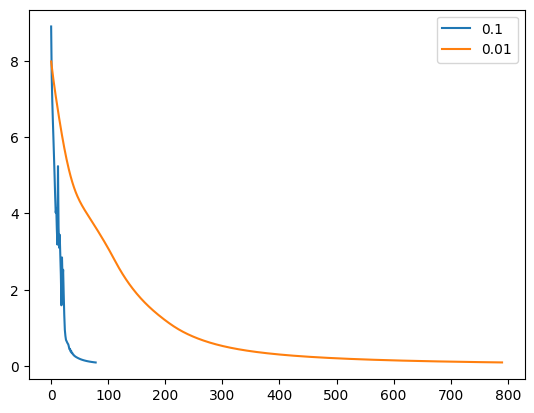

In [ ]:
if __name__ == "__main__":
    pattern_learning()

# Second part of the problem (batch training)

In [ ]:
def batch_learning(eta, hidden_layers=hidden_layers):
    pool = np.array(range(P))
    nn = NeuralNetwork(tanh_phi, input_count, hidden_layers, output_count, eta)
    epoch = 0
    E_cum = np.array([])
    while True:
        E = np.array([])
        np.random.shuffle(pool)
        for p in pool:
            Y, O = nn.hidden_final_output(s[p, :])
            E = np.append(E, nn.error(d[p, :]))
            nn.sensitivity(d[p, :])
            V, W = nn.weight_tune(s[p, :])
        E_epoch = np.sum(E)
        E_cum = np.append(E_cum, E_epoch)
        if E_epoch < Emax:
            print(f"Training is complete in {epoch} epoches.")
            return E_cum, epoch
        epoch += 1
        # print(f"epoch: {epoch}")

Learning rate: 0.1
Training is complete in 67 epoches.
Learning rate: 0.01
Training is complete in 829 epoches.


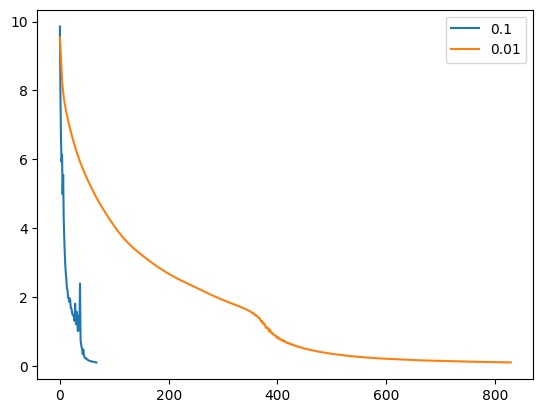

In [ ]:
if __name__ == "__main__":
    for eta in [0.1, 0.01]:
        print(f"Learning rate: {eta}")
        E_cum, _ = batch_learning(eta)
        plt.plot(E_cum)
    plt.legend(["0.1", "0.01"]); plt.show()

# Third part (finding the optimum number of hidden layer neurons)


In [ ]:
def batch_drive(hl):
    epoch_counts = []
    taken_time = []
    for hidden_layers in hl:
        start = time.time()
        _, epoch = batch_learning(0.01, hidden_layers)
        taken_time.append(time.time() - start)
        epoch_counts.append(epoch)
    return epoch_counts, taken_time

In [ ]:
hl = list(range(2, 21))
epoch_counts, taken_time = batch_drive(hl)

Training is complete in 7966 epoches.
Training is complete in 3115 epoches.
Training is complete in 2722 epoches.
Training is complete in 860 epoches.
Training is complete in 709 epoches.
Training is complete in 549 epoches.
Training is complete in 750 epoches.
Training is complete in 664 epoches.
Training is complete in 391 epoches.
Training is complete in 621 epoches.
Training is complete in 457 epoches.
Training is complete in 418 epoches.
Training is complete in 570 epoches.
Training is complete in 452 epoches.
Training is complete in 391 epoches.
Training is complete in 356 epoches.
Training is complete in 320 epoches.
Training is complete in 360 epoches.
Training is complete in 416 epoches.


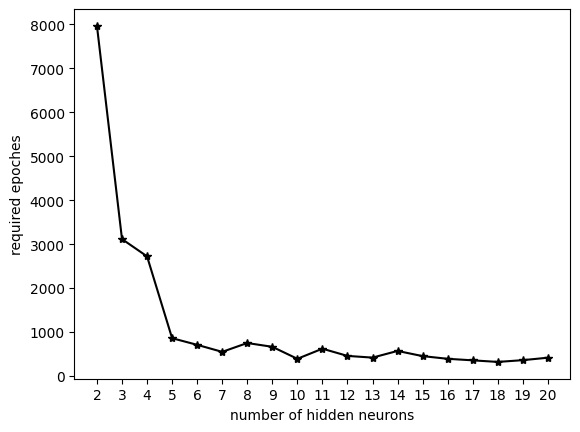

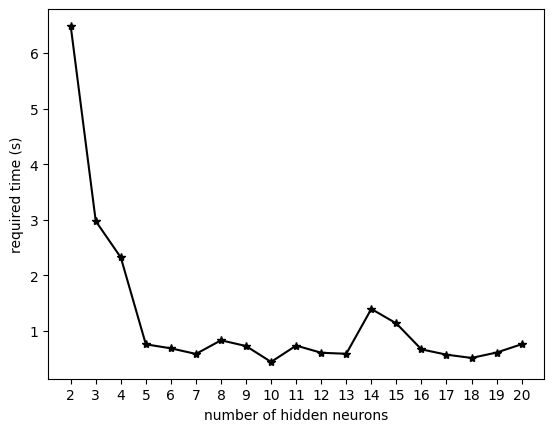

In [ ]:
plt.plot(hl, epoch_counts, 'k*-')
plt.xlabel("number of hidden neurons"); plt.xticks(hl)
plt.ylabel("required epoches"); plt.show()
plt.plot(hl, taken_time, 'k*-')
plt.xlabel("number of hidden neurons"); plt.xticks(hl)
plt.ylabel("required time (s)"); plt.show()

Running the algorithm for ENS times and taking the average of the results to plot a smooth curve

In [ ]:
if __name__ == "__main__":
    ENS = 20
    hl = list(range(3, 21))
    to_avg_epoches = np.zeros([ENS, len(hl)])
    to_avg_time = np.zeros([ENS, len(hl)])
    for e in range(ENS):
        print(f"Run number: {e}")
        epoch_counts, taken_time = batch_drive(hl)
        to_avg_epoches[e, :] = epoch_counts
        to_avg_time[e, :] = taken_time

Run number: 0
Training is complete in 1285 epoches.
Training is complete in 824 epoches.
Training is complete in 1042 epoches.
Training is complete in 568 epoches.
Training is complete in 543 epoches.
Training is complete in 492 epoches.
Training is complete in 483 epoches.
Training is complete in 676 epoches.
Training is complete in 416 epoches.
Training is complete in 692 epoches.
Training is complete in 456 epoches.
Training is complete in 707 epoches.
Training is complete in 549 epoches.
Training is complete in 424 epoches.
Training is complete in 436 epoches.
Training is complete in 373 epoches.
Training is complete in 434 epoches.
Training is complete in 337 epoches.
Run number: 1
Training is complete in 587 epoches.
Training is complete in 1077 epoches.
Training is complete in 612 epoches.
Training is complete in 683 epoches.
Training is complete in 448 epoches.
Training is complete in 470 epoches.
Training is complete in 967 epoches.
Training is complete in 493 epoches.
Trainin

In [ ]:
    mean_epoches = np.mean(to_avg_epoches, axis=0)
    std_epoches = np.std(to_avg_epoches, axis=0)
    mean_time = np.mean(to_avg_time, axis=0)
    std_time = np.std(to_avg_time, axis=0)

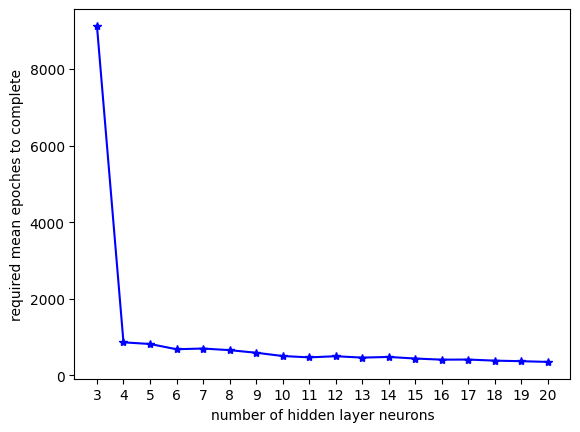

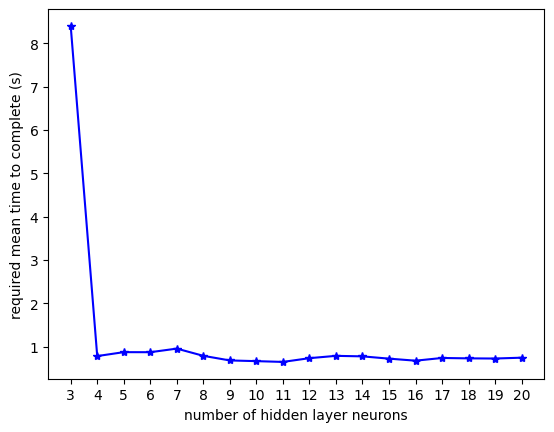

In [ ]:
    plt.plot(hl, mean_epoches, 'b*-')
    # plt.errorbar(hl, mean_epoches, std_epoches, ecolor='k', capsize=6)
    plt.xlabel("number of hidden layer neurons"); plt.xticks(hl)
    plt.ylabel("required mean epoches to complete")
    plt.show()
    plt.plot(hl, mean_time, 'b*-')
    # plt.errorbar(hl, mean_time, std_time, ecolor='k', capsize=6)
    plt.xlabel("number of hidden layer neurons"); plt.xticks(hl)
    plt.ylabel("required mean time to complete (s)")
    plt.show()